In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
"""
    Takes a SymPy Function f on (0, P) and returns the values of the Fourier
    series of the function f(x) at the point x.
"""
def FourierTrigonometricSeries(f, P, x, n):
    a_0 = 2/P * integrate.quad(f, 0, P)[0]
    acum = 0
    l_ak = lambda a: f(a) * np.cos(a*2*np.pi*k/P)
    l_bk = lambda a: f(a) * np.sin(a*2*np.pi*k/P)
    for k in range(1, n+1):
        a_k = 2/P * integrate.quad(l_ak, 0, P)[0]
        b_k = 2/P * integrate.quad(l_bk, 0, P)[0]
        acum = a_k * np.cos(2*np.pi*k*x / P)+ b_k * np.sin(2*np.pi*k*x / P)
    return a_0/2 + acum

<ipython-input-2-928eb4522c95>:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a_k = 2/P * integrate.quad(l_ak, 0, P)[0]
<ipython-input-2-928eb4522c95>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose

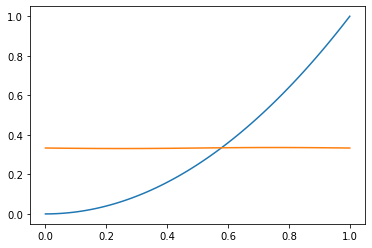

In [5]:
f = lambda x: x**2
P = 1


N = 124

dom = np.linspace(0, P, N)
y_r = f(dom)
plt.plot(dom, y_r)
y = FourierTrigonometricSeries(f, P, dom, N)
plt.plot(dom, y)
plt.show()

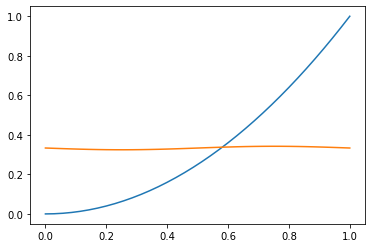

In [39]:
N = 36

dom = np.linspace(0, P, N)
y_r = f(dom)
plt.plot(dom, y_r)
y = FourierTrigonometricSeries(f, P, dom,N)
plt.plot(dom, y)
plt.show()

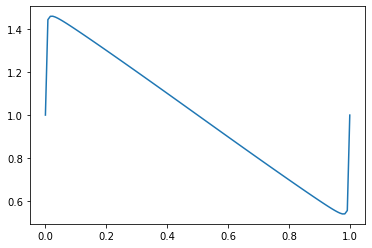

In [2]:
import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt

init_printing(use_unicode=False, wrap_line=False)

"""
    Takes a SymPy Function f on (0, P) and returns the values of the Fourier
    series of the function f(x) at the point x.
"""
def FourierTrigonometricSeries(f, P, x, n):
    a_0 = (2/P) * integrate(f, (x, 0, P))
    acum = a_0    
    for k in range(1, n+1):
        a_k = (2/P) * integrate(f * cos(2*pi*k*x/P), (x, 0, P))        
        b_k = (2/P) * integrate(f * sin(2*pi*k*x/P), (x, 0, P))
        acum = acum + a_k*cos(2*pi*k*x/P) + b_k*sin(2*pi*k*x/P)
    return acum

#Parameters
N = 124
f = 1-x
P = 1

fseries_fn = FourierTrigonometricSeries(f, P, x, N)

dom = np.linspace(0, P, N)

y = [fseries_fn.subs(x, i).evalf() for i in dom]

plt.plot(dom, y)

plt.show()